In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
from os.path import isfile
from IPython.display import HTML,display
from datetime import date,datetime


# Decir que dia y mes

In [2]:
tiempos=[]
inicio=time.time()
tiempos.append(inicio)
fin=False
while not fin:    
    i=str(input("Enter: LLegada \nFIN fin de toma de datos ")).upper()
    if i=='FIN':
        fin=True
    else:
        tiempos.append(time.time())
    
tiempos

Enter: LLegada 
FIN fin de toma de datos 
Enter: LLegada 
FIN fin de toma de datos 
Enter: LLegada 
FIN fin de toma de datos 
Enter: LLegada 
FIN fin de toma de datos 
Enter: LLegada 
FIN fin de toma de datos 
Enter: LLegada 
FIN fin de toma de datos 
Enter: LLegada 
FIN fin de toma de datos 
Enter: LLegada 
FIN fin de toma de datos 
Enter: LLegada 
FIN fin de toma de datos 
Enter: LLegada 
FIN fin de toma de datos 
Enter: LLegada 
FIN fin de toma de datos 
Enter: LLegada 
FIN fin de toma de datos 
Enter: LLegada 
FIN fin de toma de datos 
Enter: LLegada 
FIN fin de toma de datos 
Enter: LLegada 
FIN fin de toma de datos 
Enter: LLegada 
FIN fin de toma de datos 
Enter: LLegada 
FIN fin de toma de datos 
Enter: LLegada 
FIN fin de toma de datos 
Enter: LLegada 
FIN fin de toma de datos 
Enter: LLegada 
FIN fin de toma de datos 
Enter: LLegada 
FIN fin de toma de datos 
Enter: LLegada 
FIN fin de toma de datos 
Enter: LLegada 
FIN fin de toma de datos 
Enter: LLegada 
FIN fin de toma de

[1609369904.3234987,
 1609369905.337234,
 1609369906.5208302,
 1609369906.8210292,
 1609369908.0185215,
 1609369909.028325,
 1609369909.3329422,
 1609369910.6486306,
 1609369911.724358,
 1609369912.0637116,
 1609369913.4035258,
 1609369914.3921854,
 1609369914.6898127,
 1609369915.926882,
 1609369916.9673111,
 1609369917.290304,
 1609369918.5968459,
 1609369919.6320896,
 1609369919.9096618,
 1609369921.3019712,
 1609369922.2178082,
 1609369922.557712,
 1609369924.7691598,
 1609369927.2727728,
 1609369927.5506344,
 1609369927.833654]

In [3]:
tiempos

[1609369904.3234987,
 1609369905.337234,
 1609369906.5208302,
 1609369906.8210292,
 1609369908.0185215,
 1609369909.028325,
 1609369909.3329422,
 1609369910.6486306,
 1609369911.724358,
 1609369912.0637116,
 1609369913.4035258,
 1609369914.3921854,
 1609369914.6898127,
 1609369915.926882,
 1609369916.9673111,
 1609369917.290304,
 1609369918.5968459,
 1609369919.6320896,
 1609369919.9096618,
 1609369921.3019712,
 1609369922.2178082,
 1609369922.557712,
 1609369924.7691598,
 1609369927.2727728,
 1609369927.5506344,
 1609369927.833654]

In [4]:
tiempos=np.array(tiempos)

In [5]:
tabla=pd.DataFrame(data=tiempos,columns={'TIEMPOS'})

In [6]:
tabla1=tabla.diff().copy()
tabla1.dropna(inplace=True)
tabla1['TIEMPOS']=tabla1['TIEMPOS']/60
tabla1.reset_index(inplace=True,drop=True)

,TIEMPOS
0,0.016896
1,0.019727
2,0.005003
3,0.019958
4,0.016830
5,0.005077
6,0.021928
7,0.017929
8,0.005656
9,0.022330


<AxesSubplot:>

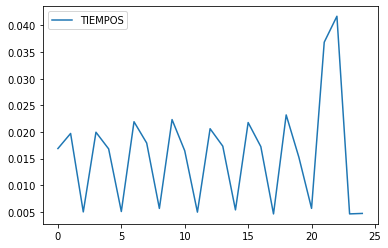

In [7]:
display(tabla1)
tabla1.plot()

<AxesSubplot:label='d01a7220-669f-4094-aa49-a4f0bc975a80'>

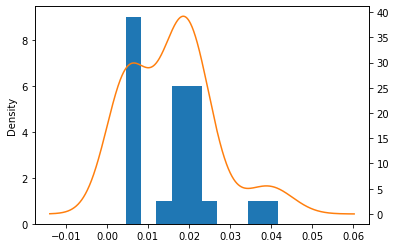

In [8]:
ax = tabla1.TIEMPOS.plot(kind='hist')
tabla1.TIEMPOS.plot(kind='kde', ax=ax, secondary_y=True)

## Insertar fecha de datos

In [9]:
#RECUPERACION DE FECHAS
dias_ordenados = ["LUNES", "MARTES", "MIÉRCOLES", "JUEVES", "VIERNES", "SÁBADO"]
dias_en_ingles = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dia=datetime.today().day
mes=datetime.today().month
año=datetime.today().year
nombre=date.today().strftime("%A")
#ALGORITMO DE IDETIFICACION DE DIA ESPAÑOL
i=0
for day in dias_en_ingles:
    if nombre==day:
        nombre=dias_ordenados[i]
    i+=1   
#AGREGACION A LA TABLA
tabla1['DIA_SEMANA']=nombre
tabla1['DIA_NUMERO']=dia
tabla1['MES']=mes
tabla1['AÑO']=año

tabla1['DIA_SEMANA']= pd.Categorical(tabla1['DIA_SEMANA'], dias_ordenados)

### Guardar tablas

In [10]:
entradas_hoy=tabla1.copy()


In [22]:
if isfile('datos.csv'):
    entradas_anteriores=pd.read_csv('datos.csv',header=0,encoding='utf-8-sig',decimal=',',sep=';')
else:
    entradas_anteriores=pd.DataFrame({'TIEMPOS':[],
                                      'DIA_SEMANA':[],
                                      'DIA_NUMERO':[],
                                      'MES':[],
                                      'AÑO':[]})


In [23]:
df=pd.concat([entradas_anteriores,
              entradas_hoy],
             axis=0).reset_index().copy()
df.drop(columns='index',inplace=True)

In [24]:
df.to_csv('datos.csv',header=True,index=False,encoding='utf-8-sig',decimal=',',sep=';')

<AxesSubplot:>

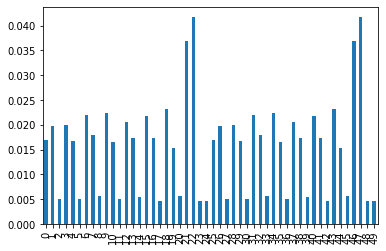

In [25]:
df.TIEMPOS.plot(kind='bar')

# Analisis

In [26]:
df['DIA_SEMANA']= pd.Categorical(df['DIA_SEMANA'], dias_ordenados)

<AxesSubplot:xlabel='DIA_SEMANA'>

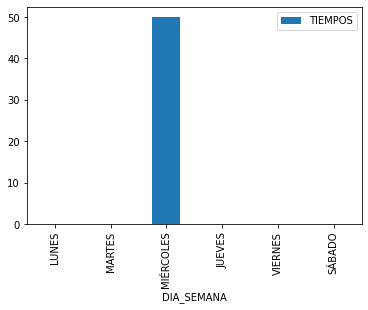

In [27]:
df.groupby(by=['DIA_SEMANA']).agg({'TIEMPOS':'count'}).plot(kind='bar')

# Ajuste de tiempos

In [28]:
from fitter import Fitter,get_common_distributions,get_distributions
print(get_common_distributions())

['cauchy', 'chi2', 'expon', 'exponpow', 'gamma', 'lognorm', 'norm', 'powerlaw', 'rayleigh', 'uniform']


,sumsquare_error,aic,bic,kl_div
exponpow,289215.550566,-471.767713,444.881296,inf
chi2,299326.761617,-439.576061,446.599474,inf
gamma,302070.188263,-388.579751,447.055653,inf
powerlaw,307416.410617,-579.877641,447.932843,inf
expon,446451.897110,-561.278211,462.677243,inf


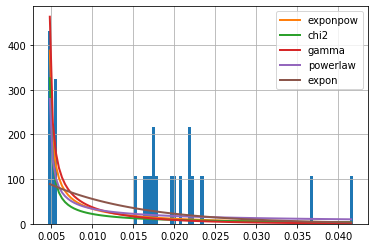

In [31]:

f = Fitter(df['TIEMPOS'],distributions=get_common_distributions())
f.fit()
f.summary()

In [32]:
f.get_best()

{'exponpow': (0.35418377474676543, 0.004626202583312988, 0.015684237954902674)}